In [6]:
import altair as alt
from vega_datasets import data
import pandas as pd
from altair_saver import save
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42

In [7]:
def sumlen_countnum(file):
    df = pd.read_csv(file,sep="\t",low_memory=False)
    df.columns = ["chr","s","e"]
    df["sub"] = df["e"] -df["s"]
    length = df["sub"].sum()
    num = df["sub"].count()
    return length,num


In [8]:
def peaksize(cuttag_f, cuttagu_f, self_f, selfu_f, out_f):
    with open(out_f,"w") as f:
        cuttag, cuttag_num = sumlen_countnum(cuttag_f)
        cuttagu, cuttagu_num = sumlen_countnum(cuttagu_f)
        cuttagu_pct = (cuttagu/cuttag)*100
        cuttagu_num_pct = (cuttagu_num/cuttag_num)*100
        cuttagother_pct = (1-cuttagu/cuttag)*100
        cuttagother_num_pct = (1-cuttagu_num/cuttag_num)*100
        self, self_num = sumlen_countnum(self_f)
        selfu, selfu_num = sumlen_countnum(selfu_f)
        selfu_pct = (selfu/self)*100
        selfu_num_pct = (selfu_num/self_num)*100
        selfother_pct = (1-selfu/self)*100
        selfuother_num_pct = (1-selfu_num/self_num)*100
        outstr1 = "PCT" + ","+ "type" + "," +  "sample"
        outstr2 = str(round(cuttagu_pct,2)) + "," + "Not_overlap"+ "," + "CUT&Tag"
        outstr3 = str(round(selfu_pct,2)) + "," +"Not_overlap"+ "," + "HiTag-1D"
        outstr4 = str(round(cuttagother_pct,2)) + "," + "overlap"+ "," + "CUT&Tag"
        outstr5 = str(round(selfother_pct,2)) + "," + "overlap"+ "," + "HiTag-1D"
        outstr6 = str(round(cuttagu_num_pct,2)) + "," + "Not_overlap_num"+ "," + "CUT&Tag"
        outstr7 = str(round(selfu_num_pct,2)) + "," +"Not_overlap_num"+ "," + "HiTag-1D"
        outstr8 = str(round(cuttagother_num_pct,2)) + "," + "overlap_num"+ "," + "CUT&Tag"
        outstr9 = str(round(selfuother_num_pct,2)) + "," + "overlap_num"+ "," + "HiTag-1D"
        final_out = "\n".join([outstr1,outstr2,outstr3,outstr4,outstr5,outstr6,outstr7,outstr8,outstr9])
        f.write(final_out)


In [11]:
peaksize("selfetc/cuttagPeak.txt", "selfetc/cuttagUniqPeak.txt", "selfetc/selfPeak.txt", "selfetc/selfUniqPeak.txt", "selfetc/peak_overlap.csv")

In [12]:
df = pd.read_csv("selfetc/peak_overlap.csv")
plt.savefig("peak_overlap.pdf")

alt.Chart(df).mark_bar().encode(
    x=alt.X('type:O',sort=['overlap', 'Not_overlap','overlap_num','Not_overlap_num']),
    y=alt.Y('PCT:Q', title="PCT(%)"),
    column= alt.Column('sample:N'),
    color=alt.Color('type',
                   scale=alt.Scale(
            domain=['Not_overlap', 'overlap','Not_overlap_num','overlap_num'],
            range=['#aca8ff','#ac73ff','#d5fdff','#9de5ff']))
)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
df = pd.read_csv("selfetc/boxplot.txt",header=None,sep="\t")
df.columns =["score","sample","type"]
df_cuttag=df[df["sample"] =="CUT&Tag"]
df_drp=df[df["sample"] =="HiTag"]

RanksumsResult(statistic=-186.279266642537, pvalue=0.0)

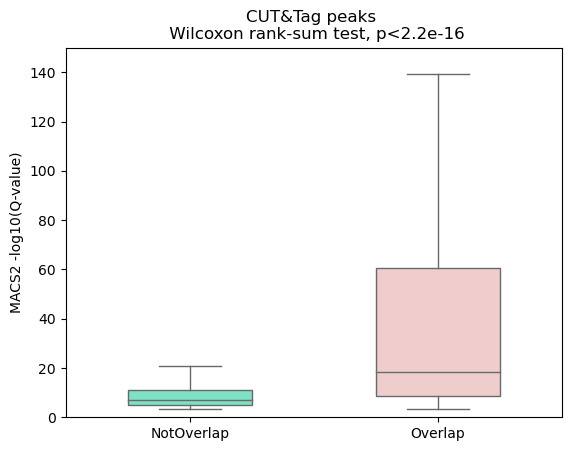

In [17]:
my_pal = {"Overlap": "#f6c7c7", "NotOverlap": "#6df1cc"}
sns.boxplot(x="type", y="score", data=df_cuttag, palette=my_pal, showfliers = False, width=.5,linewidth=1)
plt.ylim(0,150)
plt.xlabel("")
plt.ylabel("MACS2 -log10(Q-value)")
plt.title("CUT&Tag peaks \n Wilcoxon rank-sum test, p<2.2e-16")
plt.savefig("CUTTag_peak_score.pdf")
from scipy.stats import ranksums
ranksums(df_drp[df_drp["type"]=="NotOverlap"]["score"], df_drp[df_drp["type"]=="Overlap"]["score"])

RanksumsResult(statistic=-186.279266642537, pvalue=0.0)

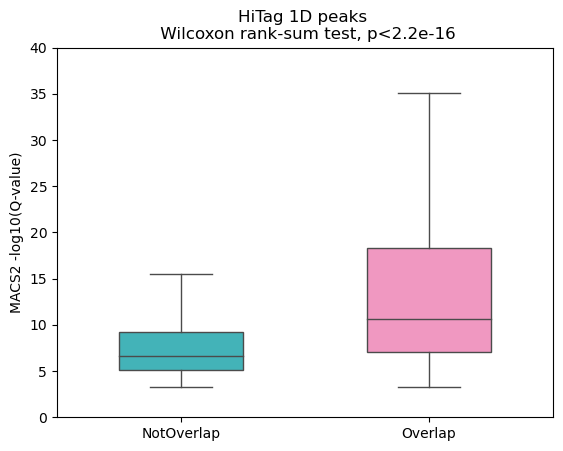

In [20]:
my_pal = {"Overlap": "#ff89c0", "NotOverlap": "#2fc5cc"}
sns.boxplot(x="type", y="score", data=df_drp, palette=my_pal, showfliers = False, width=.5,linewidth=1)
plt.ylim(0,40)
plt.xlabel("")
plt.ylabel("MACS2 -log10(Q-value)")
plt.title("HiTag 1D peaks \n Wilcoxon rank-sum test, p<2.2e-16")
plt.savefig("HiTag_peak_score.pdf")
from scipy.stats import ranksums
ranksums(df_drp[df_drp["type"]=="NotOverlap"]["score"], df_drp[df_drp["type"]=="Overlap"]["score"])

In [ ]:
!pwd